In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Rotten_Tomatoes_Movies3.xls")
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [3]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [4]:
df = df.drop(['movie_title', 'movie_info', 'critics_consensus', 'in_theaters_date', 
              'on_streaming_date', 'studio_name', 'tomatometer_status', 
              'directors', 'writers', 'cast'], axis=1)
df

,rating,genre,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,49,144,53.0
1,R,Comedy,90.0,86,140,64.0
2,R,"Comedy, Romance",118.0,68,22,53.0
3,NR,"Classics, Drama",95.0,100,51,97.0
4,G,"Action & Adventure, Drama, Kids & Family",127.0,89,27,74.0
...,...,...,...,...,...,...
16633,R,"Drama, Musical & Performing Arts",104.0,56,9,74.0
16634,PG,"Action & Adventure, Animation, Comedy",108.0,97,279,92.0
16635,NR,"Action & Adventure, Art House & International,...",142.0,78,9,87.0
16636,PG,"Classics, Drama",139.0,95,21,91.0


In [5]:
# Check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

rating                  0
genre                  17
runtime_in_minutes    155
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
dtype: int64


In [6]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

rating                0.000000
genre                 0.102176
runtime_in_minutes    0.931602
tomatometer_rating    0.000000
tomatometer_count     0.000000
audience_rating       1.514605
dtype: float64


In [7]:
# Drop rows where any column has missing values
df = df.dropna()

# Verify that there are no missing values left
print(df.isnull().sum())

rating                0
genre                 0
runtime_in_minutes    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64


<AxesSubplot:>

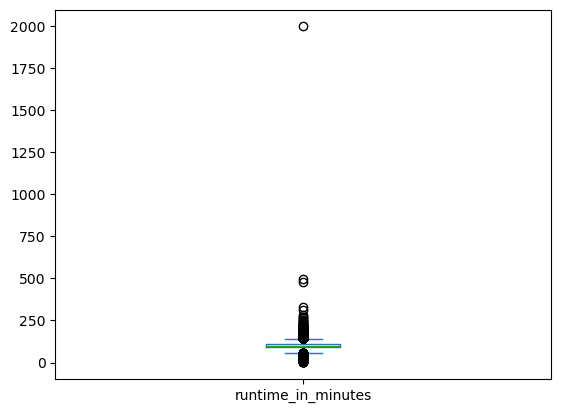

In [8]:
# Visualize using boxplot for runtime_in_minutes
df['runtime_in_minutes'].plot(kind='box')


In [9]:
outlier_rows = df[(df['runtime_in_minutes'] > 50) & (df['runtime_in_minutes']<250)]
print(outlier_rows)

      rating                                              genre  \
0         PG  Action & Adventure, Comedy, Drama, Science Fic...   
1          R                                             Comedy   
2          R                                    Comedy, Romance   
3         NR                                    Classics, Drama   
4          G           Action & Adventure, Drama, Kids & Family   
...      ...                                                ...   
16633      R                   Drama, Musical & Performing Arts   
16634     PG              Action & Adventure, Animation, Comedy   
16635     NR  Action & Adventure, Art House & International,...   
16636     PG                                    Classics, Drama   
16637     PG  Action & Adventure, Art House & International,...   

       runtime_in_minutes  tomatometer_rating  tomatometer_count  \
0                    83.0                  49                144   
1                    90.0                  86              

In [10]:
# Drop rows where runtime_in_minutes is greater than 250 or less than 40
df = df[~((df['runtime_in_minutes'] > 250) | (df['runtime_in_minutes'] < 40))]


In [11]:
df['rating'] = df['rating'].str.replace(r'[^\w\s-]', '', regex=True)

In [12]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
R        6057
NR       4559
PG-13    2835
PG       2041
G         648
NC17       37
Name: count, dtype: int64

In [13]:
# Define a function to find outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in the specified columns
outliers_tomatometer_rating = find_outliers(df, 'tomatometer_rating')
outliers_tomatometer_count = find_outliers(df, 'tomatometer_count')
outliers_audience_rating = find_outliers(df, 'audience_rating')

# Print the number of outliers in each column
print(f"Outliers in 'tomatometer_rating': {outliers_tomatometer_rating.shape[0]}")
print(f"Outliers in 'tomatometer_count': {outliers_tomatometer_count.shape[0]}")
print(f"Outliers in 'audience_rating': {outliers_audience_rating.shape[0]}")


Outliers in 'tomatometer_rating': 0
Outliers in 'tomatometer_count': 1120
Outliers in 'audience_rating': 0


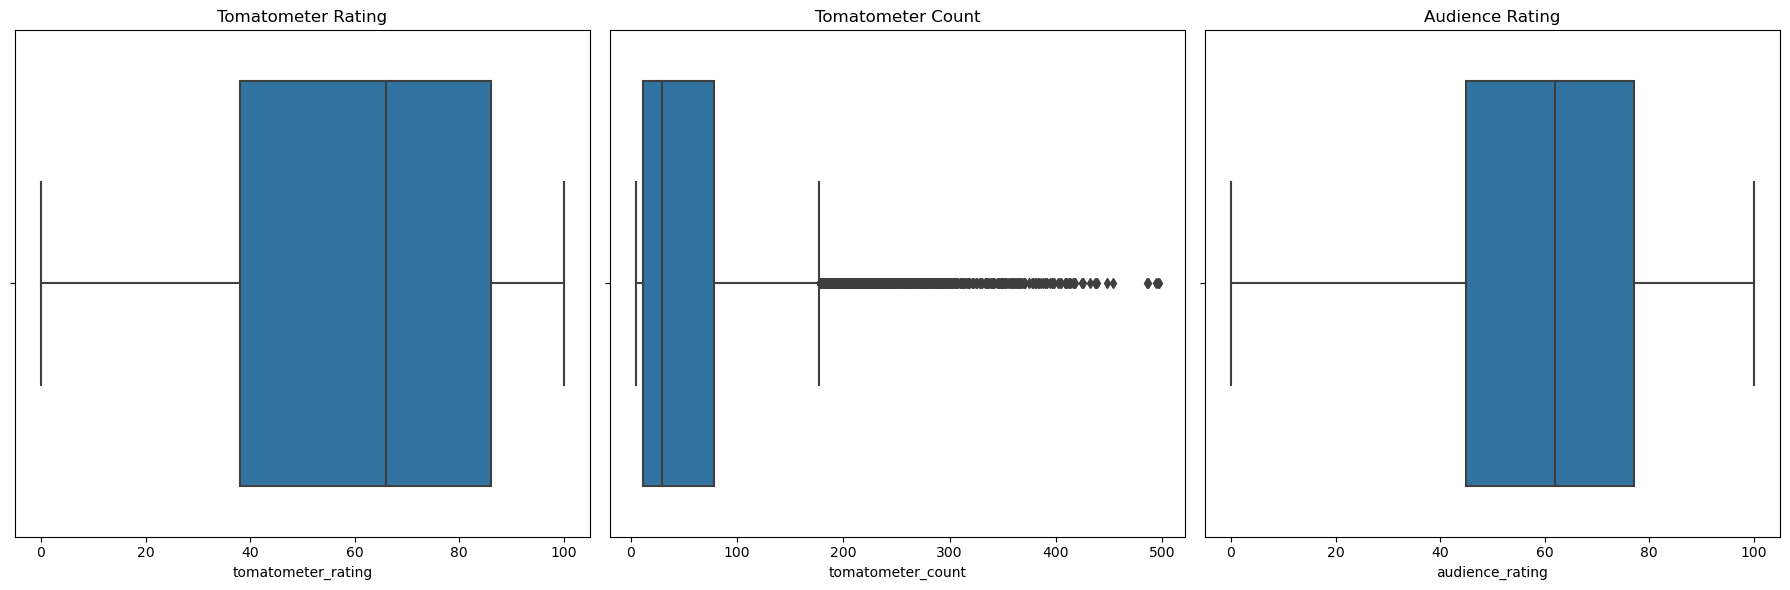

In [14]:
# Create a boxplot for each of the columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for 'tomatometer_rating'
sns.boxplot(x=df['tomatometer_rating'], ax=axes[0])
axes[0].set_title('Tomatometer Rating')

# Boxplot for 'tomatometer_count'
sns.boxplot(x=df['tomatometer_count'], ax=axes[1])
axes[1].set_title('Tomatometer Count')

# Boxplot for 'audience_rating'
sns.boxplot(x=df['audience_rating'], ax=axes[2])
axes[2].set_title('Audience Rating')

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
mean=df['tomatometer_count'].mean()
print("Mean : ", mean)
max=df['tomatometer_count'].max()
print("Max : ", max)
min=df['tomatometer_count'].min()
print("Min : ", min)

Mean :  57.145700686159365
Max :  497
Min :  5


In [16]:
# Calculate the IQR
Q1 = df['tomatometer_count'].quantile(0.25)
Q3 = df['tomatometer_count'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows where 'tomatometer_count' is outside the bounds
df = df[(df['tomatometer_count'] >= lower_bound) & (df['tomatometer_count'] <= upper_bound)]

# Check the result
print(df['tomatometer_count'].describe())


count    15057.000000
mean        43.728233
std         43.431925
min          5.000000
25%         12.000000
50%         26.000000
75%         61.000000
max        177.000000
Name: tomatometer_count, dtype: float64


In [17]:
# Calculate the IQR
Q1 = df['tomatometer_count'].quantile(0.25)
Q3 = df['tomatometer_count'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['tomatometer_count'] >= lower_bound) & (df['tomatometer_count'] <= upper_bound)]

# Verify the result
print(df['tomatometer_count'].describe())

count    14084.000000
mean        36.059642
std         33.111315
min          5.000000
25%         11.000000
50%         23.000000
75%         50.000000
max        134.000000
Name: tomatometer_count, dtype: float64


In [18]:
df = pd.get_dummies(df, columns=['rating'], drop_first=True)

In [19]:
df

,genre,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R
2,"Comedy, Romance",118.0,68,22,53.0,False,False,False,False,True
3,"Classics, Drama",95.0,100,51,97.0,False,True,False,False,False
4,"Action & Adventure, Drama, Kids & Family",127.0,89,27,74.0,False,False,False,False,False
6,"Action & Adventure, Classics, Mystery & Suspense",87.0,96,47,86.0,False,True,False,False,False
7,"Classics, Drama, Western",92.0,96,27,78.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16632,"Action & Adventure, Comedy, Kids & Family",88.0,3,66,33.0,False,False,True,False,False
16633,"Drama, Musical & Performing Arts",104.0,56,9,74.0,False,False,False,False,True
16635,"Action & Adventure, Art House & International,...",142.0,78,9,87.0,False,True,False,False,False
16636,"Classics, Drama",139.0,95,21,91.0,False,False,True,False,False


In [20]:
# Step 1: Split the genre column into a list of genres
df['genre'] = df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [21]:
## Step 2: Use MultiLabelBinarizer to convert genres into separate binary columns
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

In [22]:
df.reset_index(drop=True, inplace=True)
genre_df.reset_index(drop=True, inplace=True)
# Step 4: Concatenate the genre DataFrame back to the original DataFrame
df = pd.concat([df, genre_df], axis=1)

# Step 5: Optionally, drop the original 'genre' column if no longer needed
df = df.drop('genre', axis=1)

df.head()

   runtime_in_minutes  tomatometer_rating  tomatometer_count  audience_rating  \
0               118.0                  68                 22             53.0   
1                95.0                 100                 51             97.0   
2               127.0                  89                 27             74.0   
3                87.0                  96                 47             86.0   
4                92.0                  96                 27             78.0   

   rating_NC17  rating_NR  rating_PG  rating_PG-13  rating_R  \
0        False      False      False         False      True   
1        False       True      False         False     False   
2        False      False      False         False     False   
3        False       True      False         False     False   
4        False       True      False         False     False   

   Action & Adventure  ...  Horror  Kids & Family  Musical & Performing Arts  \
0                   0  ...       0              

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('audience_rating', axis=1)  # Features
y = df['audience_rating']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Linear Regression -R^2 Score:", r2_score(y_test, y_pred))

Linear Regression - Mean Squared Error: 210.22006598240276
Linear Regression -R^2 Score: 0.514433514970807


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Regressor - MSE: {rf_mse}")
print(f"Random Forest Regressor - R²: {rf_r2}")

Random Forest Regressor - MSE: 212.72735994357845
Random Forest Regressor - R²: 0.5086421652727011


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Calculate performance metrics
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting Regressor - MSE: {gb_mse}")
print(f"Gradient Boosting Regressor - R²: {gb_r2}")

Gradient Boosting Regressor - MSE: 196.6443642212927
Gradient Boosting Regressor - R²: 0.5457906823046743


In [28]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Calculate performance metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"Support Vector Regressor - MSE: {svr_mse}")
print(f"Support Vector Regressor - R²: {svr_r2}")


Support Vector Regressor - MSE: 228.1814042553991
Support Vector Regressor - R²: 0.4729464007370535


In [29]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Calculate performance metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f"KNN Regressor - MSE: {knn_mse}")
print(f"KNN Regressor - R²: {knn_r2}")


KNN Regressor - MSE: 263.5081292154774
KNN Regressor - R²: 0.391348701743399
